In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("gold_monthly_csv.csv", parse_dates=["Date"])
df.head()

,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [3]:
df.shape

(847, 2)

In [4]:
print(f"Data range of gold prices available from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from 1950-01-01 00:00:00 to 2020-07-01 00:00:00


In [5]:
date = pd.date_range(start="1/1/1950", end= "8/1/2020", freq="M")
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [21]:
df['month'] = date 
# df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


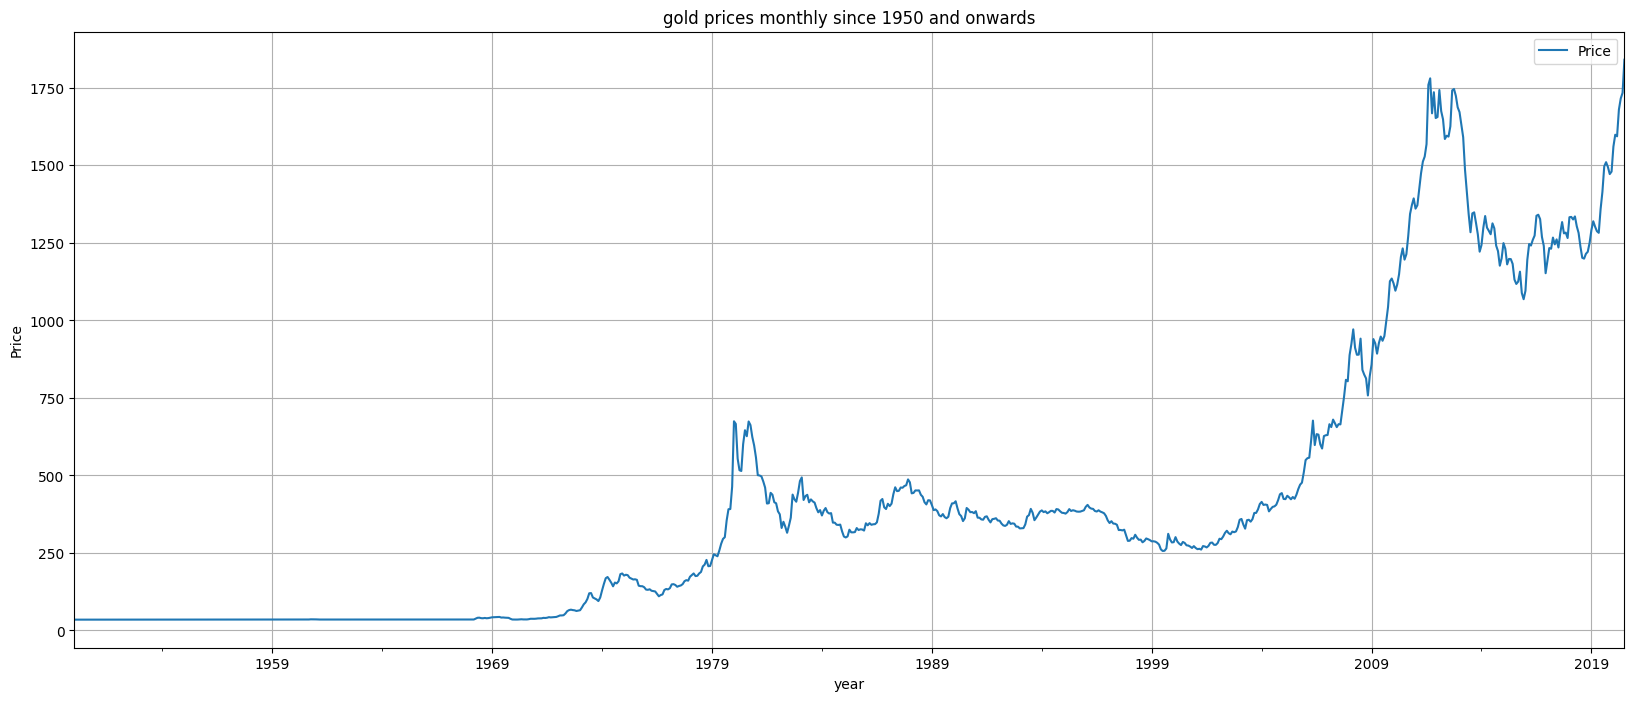

In [23]:
df.plot(figsize = (20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("year")
plt.ylabel("Price")
plt.grid()
plt.show()

In [8]:
round(df.describe(), 3)

,Date,Price
count,847,847.000
mean,1985-04-01 05:36:37.402597376,416.557
min,1950-01-01 00:00:00,34.490
25%,1967-08-16 12:00:00,35.190
50%,1985-04-01 00:00:00,319.622
75%,2002-11-16 00:00:00,447.029
max,2020-07-01 00:00:00,1840.807
std,NaN,453.665


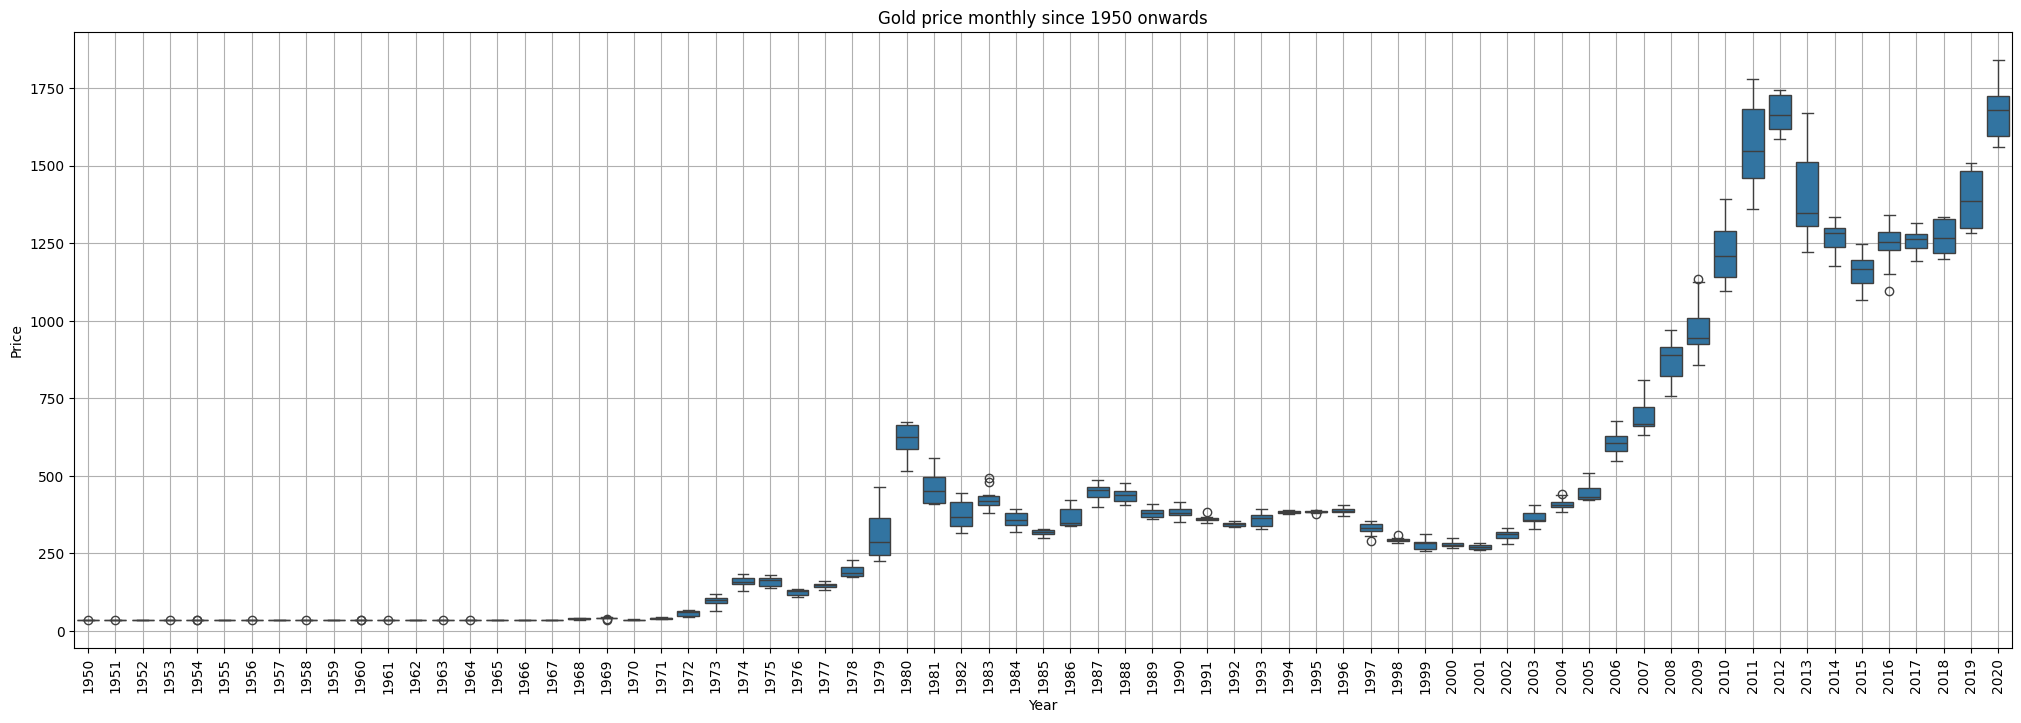

In [25]:
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0], ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()


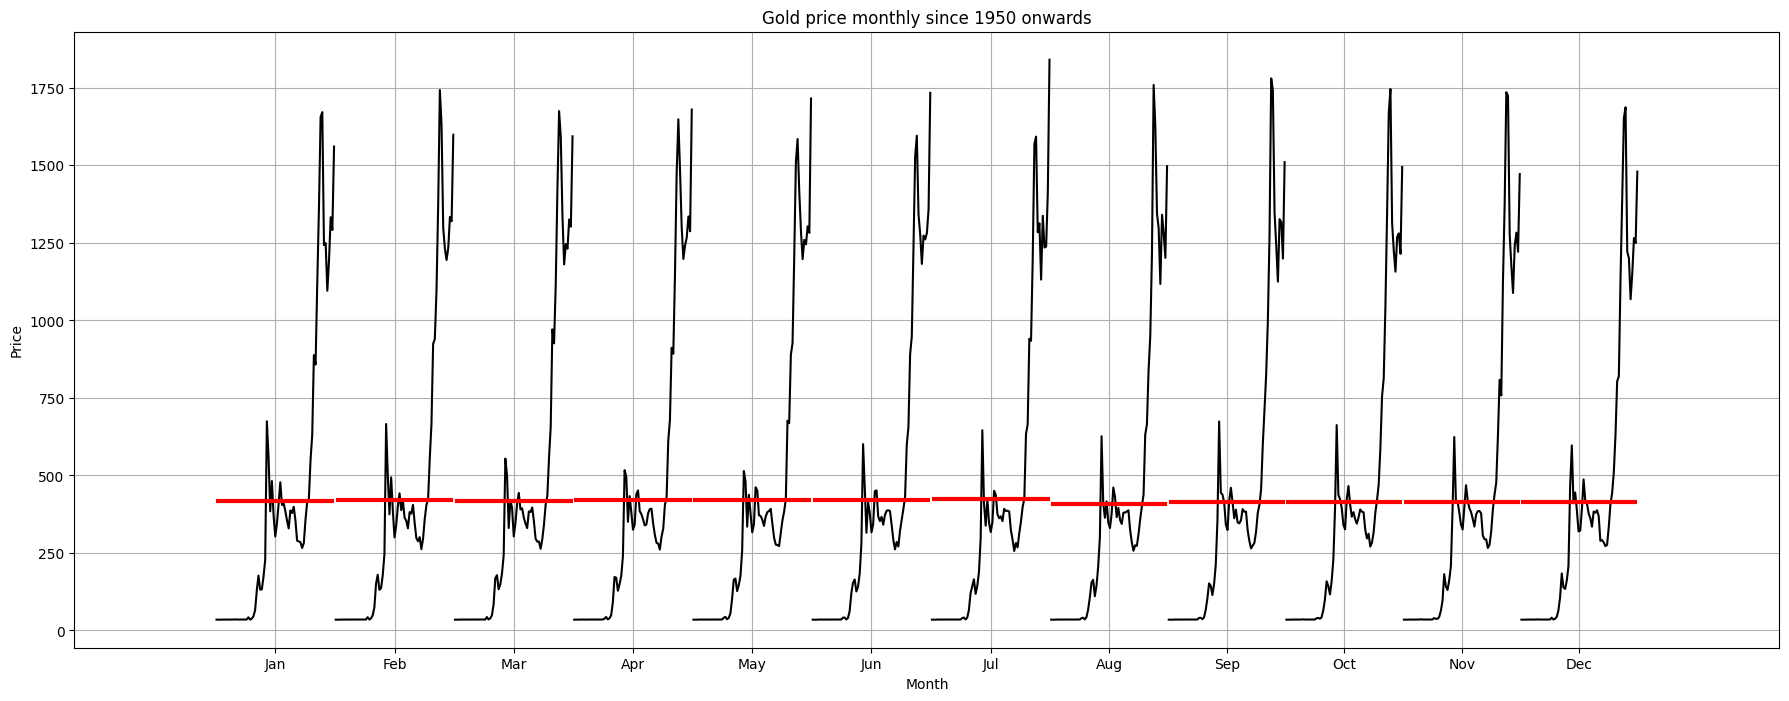

In [27]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22, 8))
month_plot(df, ylabel= 'Gold price', ax = ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()
plt.show()

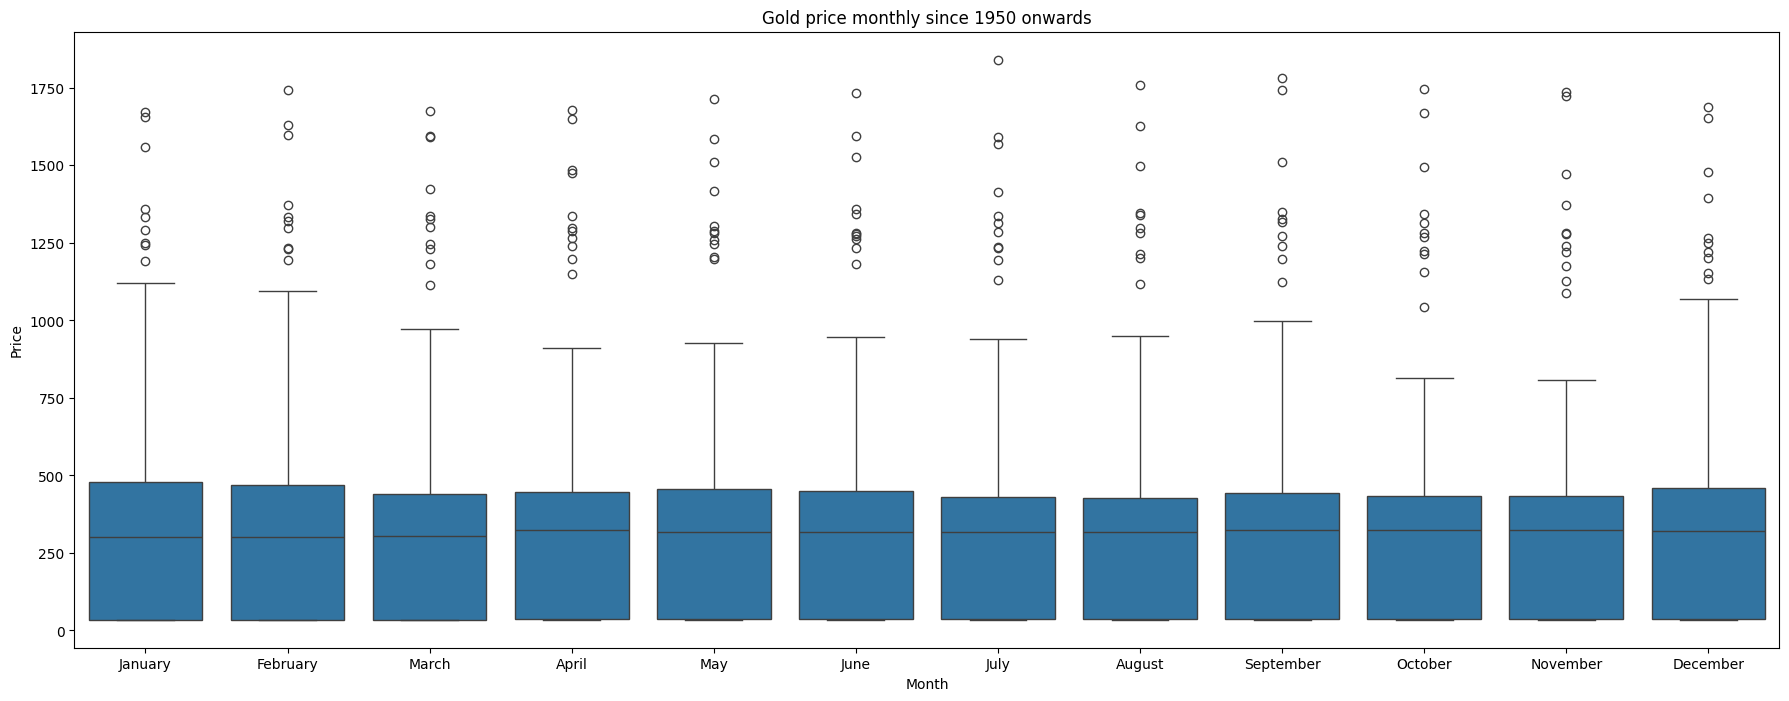

In [29]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax = ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

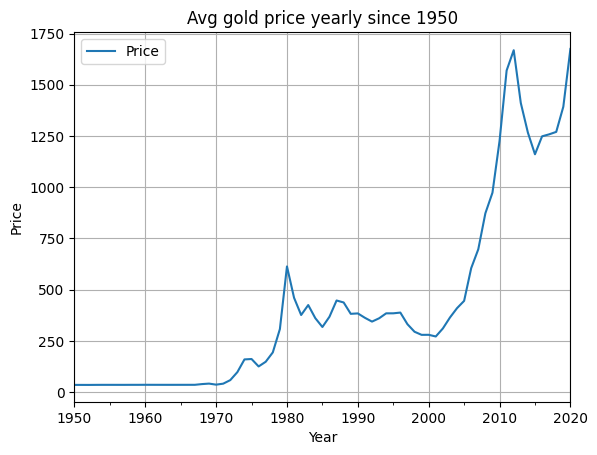

In [31]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()
plt.show()

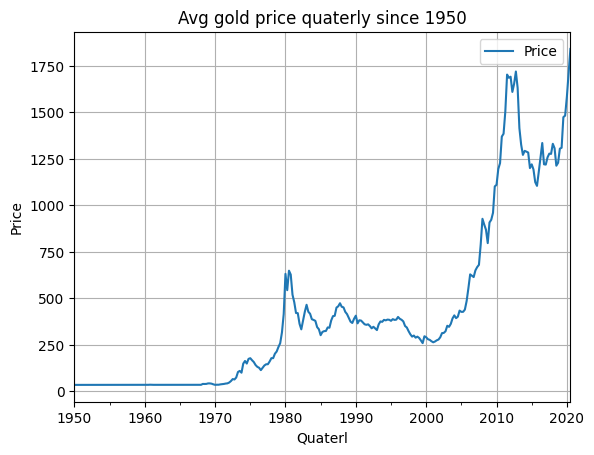

In [33]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title("Avg gold price quaterly since 1950")
plt.xlabel("Quaterl")
plt.ylabel("Price")
plt.grid()
plt.show()

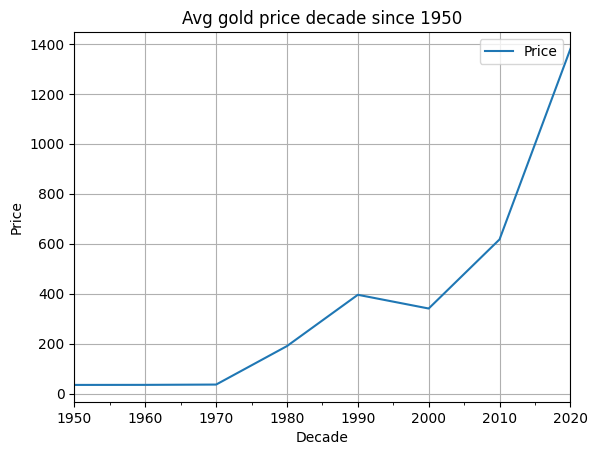

In [35]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Avg gold price decade since 1950")
plt.xlabel("Decade")
plt.ylabel("Price")
plt.grid()
plt.show()

In [39]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}), left_index = True, right_index = True)
df_1['Cov_pct']=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


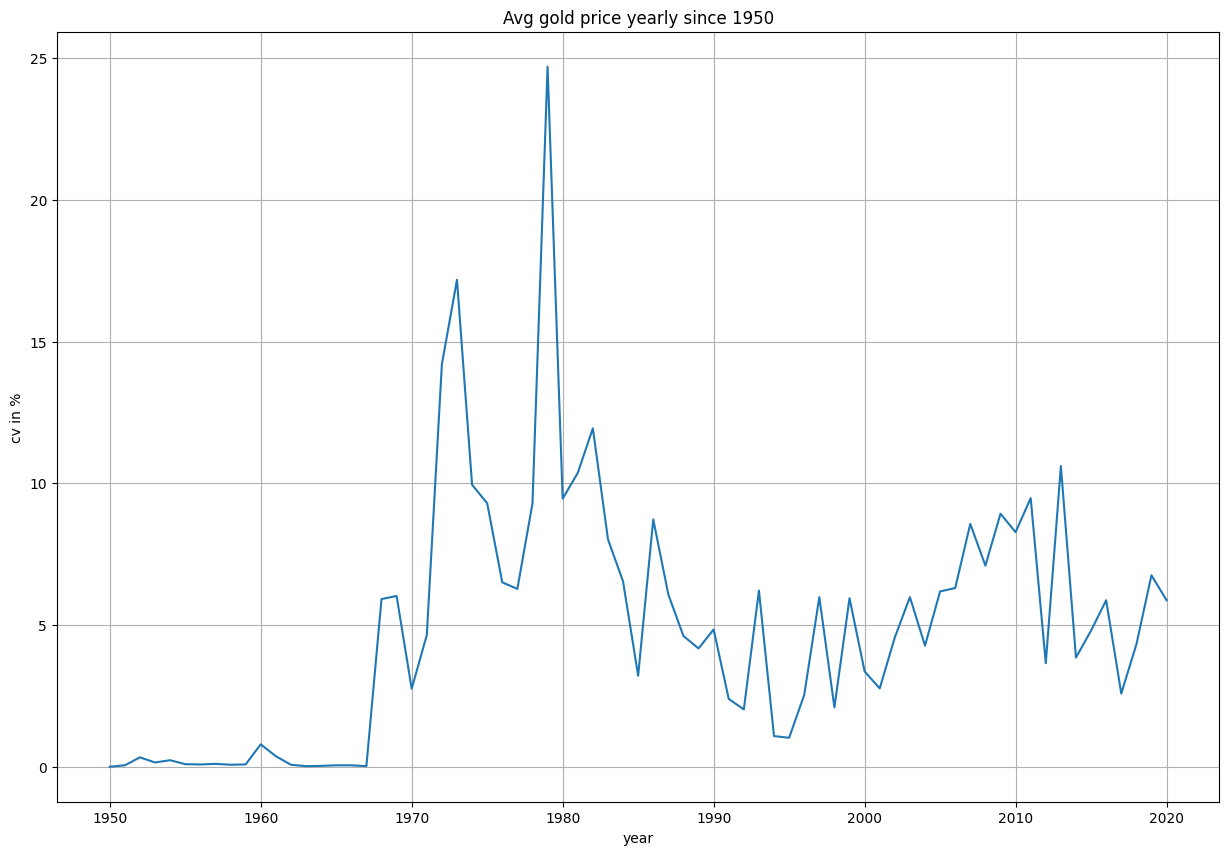

In [41]:
fig, ax= plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel("cv in %")
plt.grid()
plt.show()

In [47]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [49]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


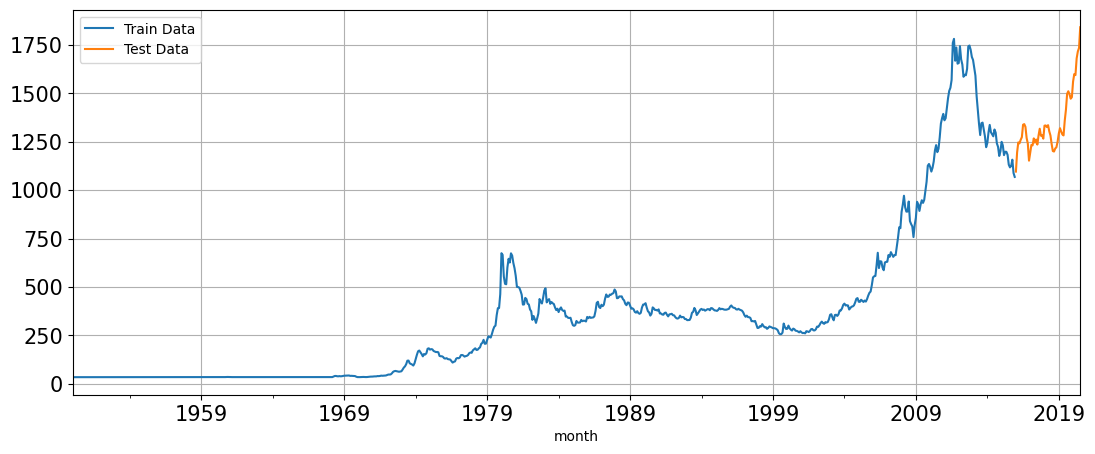

In [59]:
train['Price'].plot(figsize= (13,5), fontsize= 15)
test['Price'].plot(figsize= (13,5), fontsize= 15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.show()

In [61]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [63]:
LR_train = train.copy()
LR_test = test.copy()

In [67]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [73]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

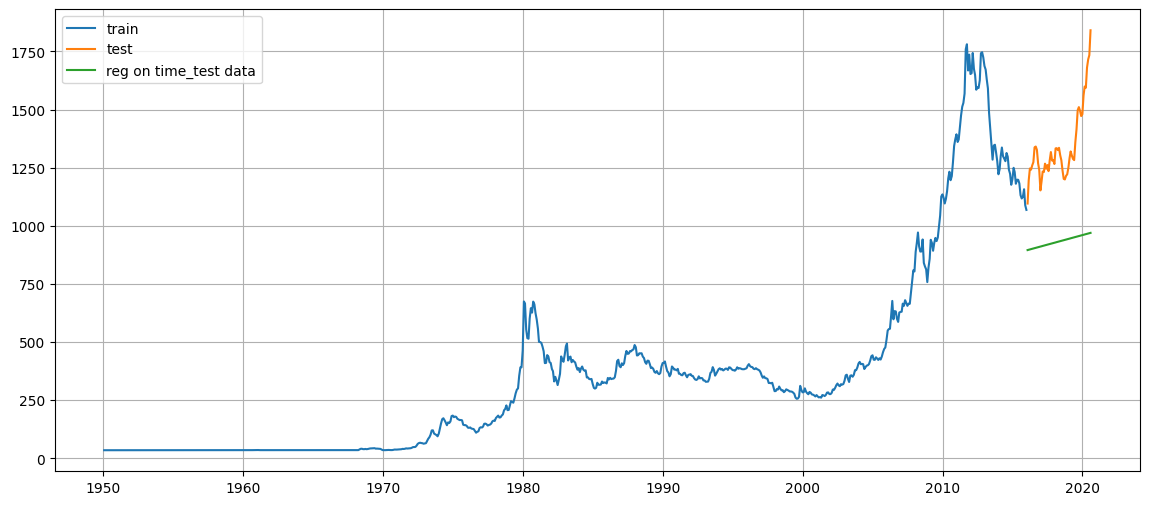

In [81]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1 

plt.figure(figsize = (14, 6))
plt.plot(train['Price'],label = 'train')
plt.plot(test['Price'],label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [83]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))* 100, 2)

In [87]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("Mape is %3.3f" %(mape_model1_test),"%")

Mape is 29.760 %


In [89]:
result = pd.DataFrame({'Test Mape (%)' : [mape_model1_test]}, index = ['RegressionOnTime'])
result

,Test Mape (%)
RegressionOnTime,29.76


In [93]:
Naive_train = train.copy()
Naive_test = test.copy()

In [95]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

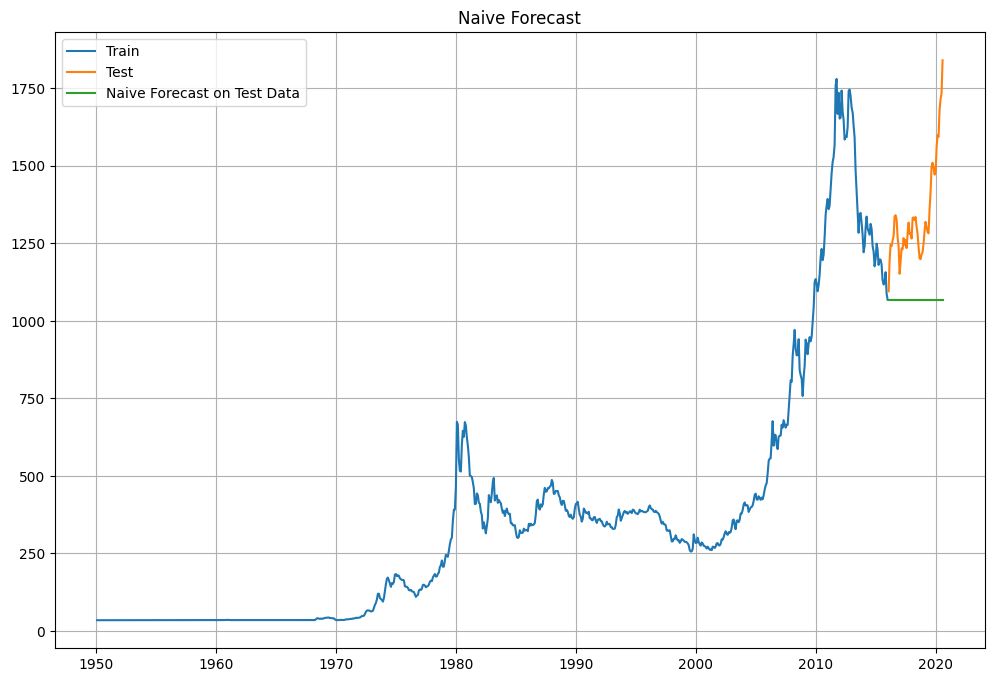

In [97]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [99]:
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f" % (mape_model2_test), "%")


For Naive forecast on the Test Data, MAPE is 19.380 %


In [105]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])
result = pd.concat([result, resultsDf_2])
result

,Test Mape (%),Test MAPE (%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [107]:
final_model = ExponentialSmoothing(df,
                                trend='additive',
                                seasonal='additive').fit(smoothing_level=0.4,
                                                         smoothing_trend=0.3,
                                                         smoothing_seasonal=0.6)

In [109]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.23


In [113]:
predictions = final_model.forecast(steps=len(test))

In [119]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96 * np.std(final_model.resid, ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions + 1.96 * np.std(final_model.resid, ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.722153,1792.873129,1901.024104
2020-09-30,1615.309735,1723.460710,1831.611685
2020-10-31,1538.573100,1646.724075,1754.875050
2020-11-30,1476.765031,1584.916007,1693.066982
2020-12-31,1459.334548,1567.485523,1675.636498


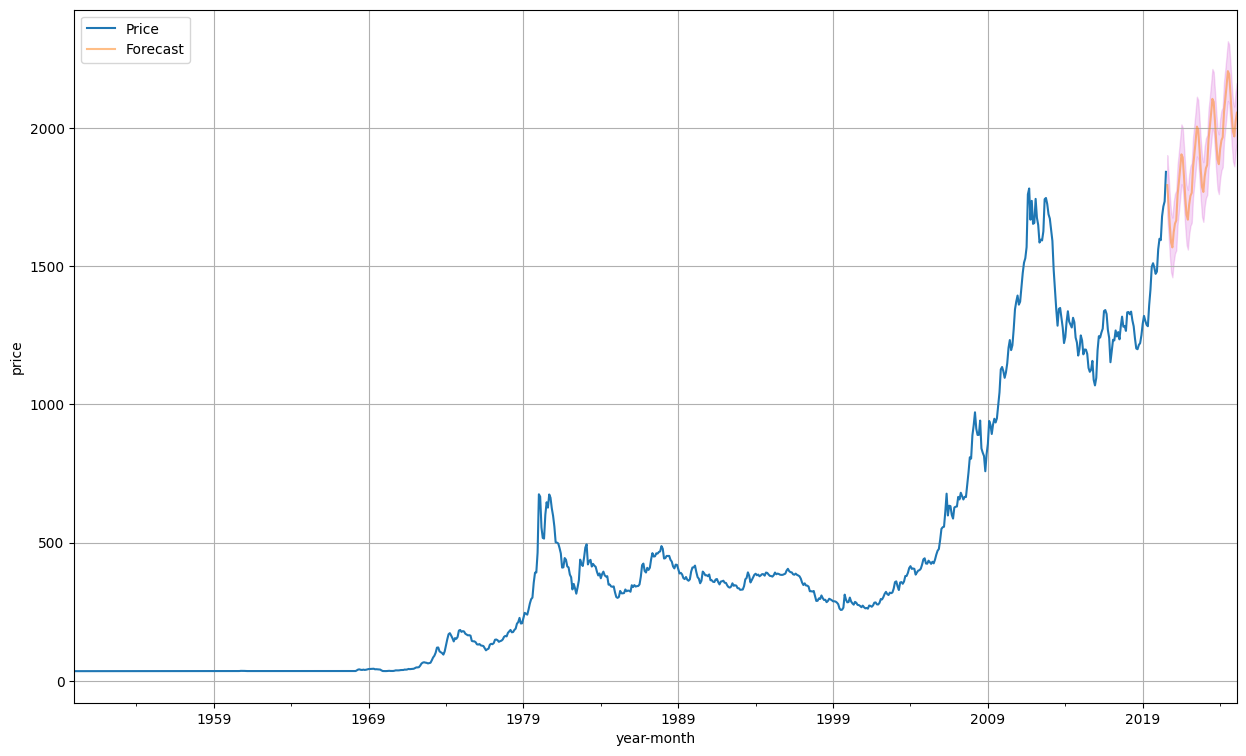

In [121]:
axis = df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()